## Craiglist Time Series Model / Analysis 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta

In [2]:
df_craiglist = pd.read_csv('craigslist_vehicles.csv')
df_craiglist.head(5)

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,type,paint_color,image_url,description,county,state,lat,long,posting_date,removal_date
0,362773,7307679724,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-05-02 00:00:00+00:00
1,362712,7311833696,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4500,2002.0,bmw,x5,NaN,...,NaN,NaN,https://images.craigslist.org/00m0m_iba78h8ty9...,"$4,500 Cash 2002 BMW X5 8 cylinder 4.4L moto...",NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-04-28 00:00:00+00:00
2,362722,7311441996,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,4900,2006.0,toyota,camry,excellent,...,sedan,silver,https://images.craigslist.org/00808_5FkOw2aGjA...,2006 TOYOTA CAMRY LE Sedan Ready To Upgrade ...,NaN,tx,32.453848,-99.787900,2021-04-23 00:00:00+00:00,2021-05-25 00:00:00+00:00
3,362771,7307680715,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-16 00:00:00+00:00,2021-04-26 00:00:00+00:00
4,362710,7311834578,https://abilene.craigslist.org/ctd/d/abilene-2...,abilene,https://abilene.craigslist.org,6500,2008.0,ford,expedition,NaN,...,NaN,NaN,https://images.craigslist.org/00M0M_i9CoFvVq8o...,$6500.00 2008 Ford Expedition 8 cylinder 5.4L...,NaN,tx,32.401556,-99.884713,2021-04-24 00:00:00+00:00,2021-05-12 00:00:00+00:00


### Data Pre-Processing

In [3]:
df_craiglist.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'county', 'state', 'lat',
       'long', 'posting_date', 'removal_date'],
      dtype='object')

In [4]:
df_craiglist.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
len(df_craiglist)

426880

In [6]:
df_craiglist.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [7]:
df_craiglist.region.unique()

array(['abilene', 'akron / canton', 'albany', 'albuquerque',
       'clovis / portales', 'lehigh valley', 'altoona-johnstown',
       'amarillo', 'southwest KS', 'ames', 'anchorage / mat-su',
       'annapolis', 'ann arbor', 'appleton-oshkosh-FDL', 'asheville',
       'ashtabula', 'athens', 'west virginia (old)', 'huntington-ashland',
       'atlanta', 'auburn', 'augusta', 'austin', 'bakersfield',
       'baltimore', 'baton rouge', 'battle creek',
       'beaumont / port arthur', 'bellingham', 'bemidji', 'bend',
       'bowling green', 'birmingham', 'meridian', 'southwest TX',
       'billings', 'binghamton', 'bismarck', 'eastern montana',
       'new river valley', 'bloomington', 'bloomington-normal', 'boise',
       'elko', 'boone', 'boston', 'boulder', 'eastern CO', 'bozeman',
       'brainerd', 'brownsville', 'brunswick', 'buffalo', 'butte',
       'cape cod / islands', 'southern illinois', 'catskills',
       'cedar rapids', 'central louisiana', 'deep east texas',
       'central 

In [8]:
# Null checks however I am only dropping on the date part for now sa no rules are set for imputtion of values
null_counts = df_craiglist.isnull().sum()
null_counts

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
removal_date        68
dtype: int64

In [9]:
# Dropping rows with null posting dates as we need this to determine the inventory count
columns_to_check = ['posting_date']
df_craiglist = df_craiglist.dropna(subset=columns_to_check)

In [10]:
len(df_craiglist)

426812

In [11]:
df_craiglist['posting_date'] = pd.to_datetime(df_craiglist['posting_date'])
df_craiglist['removal_date'] = pd.to_datetime(df_craiglist['removal_date'])
df_craiglist['year'] = df_craiglist['year'].fillna(-1) #remove NaN impute to -1 to convert to int
df_craiglist['year'] = df_craiglist['year'].astype(int)
df_craiglist['price'] = df_craiglist['price'].astype(float)

In [13]:
# Parse date time for each value to be stored on separate field
df_craiglist['posting_date_year'] = df_craiglist['posting_date'].dt.year
df_craiglist['posting_date_year'] = df_craiglist['posting_date_year'].astype(int)

df_craiglist['posting_date_month'] = df_craiglist['posting_date'].dt.month
df_craiglist['posting_date_month'] = df_craiglist['posting_date_month'].astype(int)

df_craiglist['posting_date_year_month'] = df_craiglist['posting_date'].dt.strftime('%Y-%m')
df_craiglist['posting_date_dt'] = df_craiglist['posting_date'].dt.date

df_craiglist['removal_date_year'] = df_craiglist['removal_date'].dt.year
df_craiglist['removal_date_year'] = df_craiglist['removal_date_year'].astype(int)

df_craiglist['removal_date_month'] = df_craiglist['removal_date'].dt.month
df_craiglist['removal_date_month'] = df_craiglist['removal_date_month'].astype(int)

df_craiglist['removal_date_year_month'] = df_craiglist['removal_date'].dt.strftime('%Y-%m')
df_craiglist['removal_date_dt'] = df_craiglist['removal_date'].dt.date


In [15]:
(df_craiglist[['posting_date', 'posting_date_year', 'posting_date_month', 
               'posting_date_year_month', 'posting_date_dt',
              'removal_date','removal_date_year', 'removal_date_month', 
               'removal_date_year_month', 'removal_date_dt']].head())

,posting_date,posting_date_year,posting_date_month,posting_date_year_month,posting_date_dt,removal_date,removal_date_year,removal_date_month,removal_date_year_month,removal_date_dt
0,2021-04-16 00:00:00+00:00,2021,4,2021-04,2021-04-16,2021-05-02 00:00:00+00:00,2021,5,2021-05,2021-05-02
1,2021-04-24 00:00:00+00:00,2021,4,2021-04,2021-04-24,2021-04-28 00:00:00+00:00,2021,4,2021-04,2021-04-28
2,2021-04-23 00:00:00+00:00,2021,4,2021-04,2021-04-23,2021-05-25 00:00:00+00:00,2021,5,2021-05,2021-05-25
3,2021-04-16 00:00:00+00:00,2021,4,2021-04,2021-04-16,2021-04-26 00:00:00+00:00,2021,4,2021-04,2021-04-26
4,2021-04-24 00:00:00+00:00,2021,4,2021-04,2021-04-24,2021-05-12 00:00:00+00:00,2021,5,2021-05,2021-05-12


In [19]:
min(df_craiglist.removal_date)

Timestamp('2021-04-04 00:00:00+0000', tz='UTC')

In [17]:
max(df_craiglist.removal_date)

Timestamp('2021-06-30 00:00:00+0000', tz='UTC')

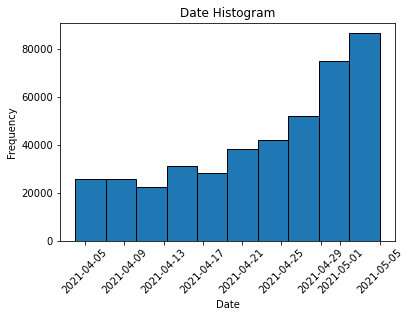

In [24]:
# Create the histogram
plt.hist(df_craiglist['posting_date_dt'], bins=10, edgecolor='black')

# Customize the histogram
plt.title('Date Histogram')
plt.xlabel('Date')
plt.ylabel('Frequency')

# Format the date labels
date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

# Display the histogram
plt.show()


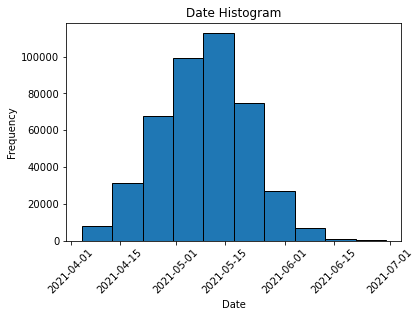

In [25]:
# Create the histogram
plt.hist(df_craiglist['removal_date'], bins=10, edgecolor='black')

# Customize the histogram
plt.title('Date Histogram')
plt.xlabel('Date')
plt.ylabel('Frequency')

# Format the date labels
date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)

# Display the histogram
plt.show()


#### Inventory Model

The idea behind the inventory count is to calculate the total number of posted cars by considering the posting_date and comparing it with the removal date. The goal is to determine the difference in days and obtain the overall variance. Ideally, this calculation can also be grouped by different keys, such as region. I am treating the record level as our Fact Table though the dimension tables need to be separated into different tables within the schema, will explain the design at the end of the notebook.

However, for demonstration purposes, we will only use the region as the grouping key. It's worth noting that this approach may not be the most efficient one if we need to dynamically drill up or drill down and slice the data by other dimensions this is not possible. However, using the same underlying dataset at the record level, we can process it using an analytical tool like SSAS or directly utilize PowerBI/Tableau. These tools facilitate slicing and drill up/down capabilities for the data analysis.

In [130]:
def create_inventory_model_count(start_date, end_date, region=None):
    
    """
        This will create the inventory count based on the difference
        of the total count of posted - removed date against each date.
        
        start_date - string value for start date
        end_date - string value for end date 
        region - filter the grouping to a specific region
    """
    
    start_date = pd.to_datetime(start_date).date()
    end_date = pd.to_datetime(end_date).date()

    current_date = start_date
    current_list = []
    posting_lst = []
    removal_lst = []
    inventory_lst = []
    daily_posting_lst = []
    daily_removal_lst = []
    
    while current_date <= end_date:
        if region is None:
            posting_count = len(df_craiglist[df_craiglist['posting_date_dt'] <= current_date])
            removal_count = len(df_craiglist[df_craiglist['removal_date_dt'] <= current_date])
            daily_posting_count = len(df_craiglist[df_craiglist['posting_date_dt'] == current_date])
            daily_removal_count = len(df_craiglist[df_craiglist['removal_date_dt'] == current_date])
        else:
            posting_count = len(df_craiglist[(df_craiglist['posting_date_dt'] <= current_date) &
                                             (df_craiglist['region'] == region)])
            removal_count = len(df_craiglist[(df_craiglist['removal_date_dt'] <= current_date) &
                                             (df_craiglist['region'] == region)])
            daily_posting_count = len(df_craiglist[(df_craiglist['posting_date_dt'] == current_date) &
                                                   (df_craiglist['region'] == region)])
            daily_removal_count = len(df_craiglist[(df_craiglist['removal_date_dt'] == current_date) &
                                                   (df_craiglist['region'] == region)])
            
        total_inventory = posting_count - removal_count
        
        current_list.append(current_date)
        posting_lst.append(posting_count)
        removal_lst.append(removal_count)
        inventory_lst.append(total_inventory)
        daily_posting_lst.append(daily_posting_count)
        daily_removal_lst.append(daily_removal_count)
        current_date += timedelta(days=1)

    
    df = pd.DataFrame({
        'inventory_date': current_list,
        'posting_count': posting_lst,
        'removal_count': removal_lst,
        'inventory_count': inventory_lst,
        'daily_posting_count': daily_posting_lst,
        'daily_removal_count': daily_removal_lst
    })
        
    return df


In [131]:
df_inventory = create_inventory_model_count('2021-04-04', '2021-06-30')

In [92]:
print(f'Total number of dtaa points: {len(df_inventory)}')

Total number of dtaa points: 88


In [134]:
df_inventory.head(5)

,inventory_date,posting_count,removal_count,inventory_count,daily_posting_count,daily_removal_count
0,2021-04-04,3517,47,3470,3517,47
1,2021-04-05,10872,220,10652,7355,173
2,2021-04-06,17978,594,17384,7106,374
3,2021-04-07,25627,1157,24470,7649,563
4,2021-04-08,34239,1972,32267,8612,815


### Sample Reports

#### Trend Line Report for Daily Inventory Count using Inventory model

We can observe that the inventory reached its peak on '2021-05-04' and began to decline. This downward trend occurred as postings were being removed, and there were fewer new posts available. However, it's important to note that with only 88 data points, grouping the data on a monthly or higher basis may not provide meaningful insights. 

If we had a continuous daily dataset, the trend would likely exhibit different patterns, allowing for more comprehensive analysis. Additionally, depending on the time frame and available filters such as region, manufacturer, model, and price range, different levels of analysis could be performed to gain further insights.

By incorporating additional data and applying various filters, it becomes possible to conduct more detailed analyses and obtain a deeper understanding of the inventory trends and their underlying factors.

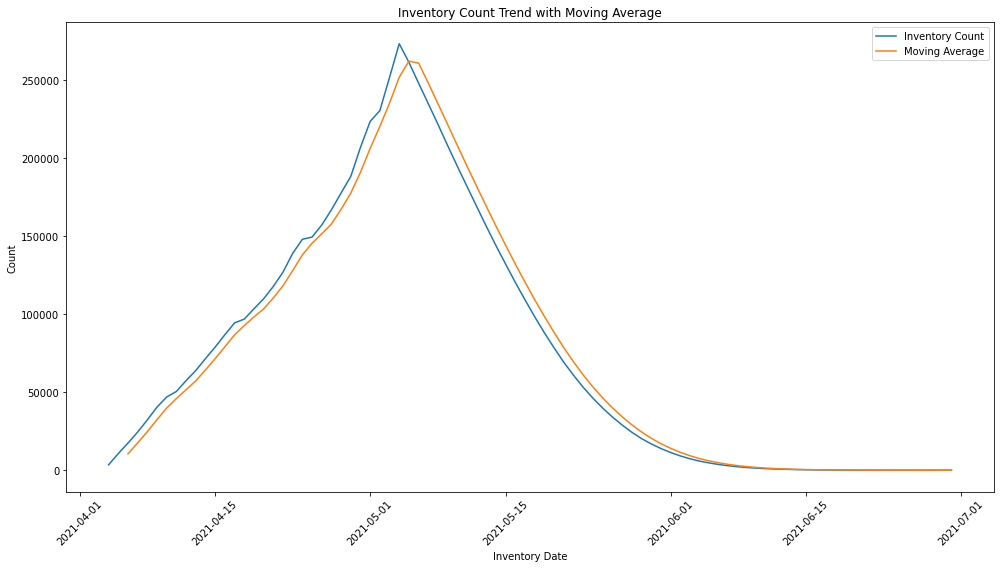

In [132]:
def plot_trend_inventory(df, title):

    # Set the inventory_date column as the index
    df.set_index('inventory_date', inplace=True)

    # Calculate the moving average
    df['moving_average'] = df['inventory_count'].rolling(window=3).mean()

    # Plotting the data
    plt.figure(figsize=(14, 8))
    plt.plot(df.index, df['inventory_count'], label='Inventory Count')
    plt.plot(df.index, df['moving_average'], label='Moving Average')

    # Set date label format and rotation
    date_format = mdates.DateFormatter('%Y-%m-%d')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.xticks(rotation=45)

    # Customize other plot elements
    plt.xlabel('Inventory Date')
    plt.ylabel('Count')
    plt.title(title)
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()
    
plot_trend_inventory(df_inventory.copy(), 'Inventory Count Trend with Moving Average')

#### Posting vs Removal Count Trend

In the plot, we can observe that the peak of postings occurred around May', which marked the final dates when new posts were made. From that point onward, existing posts began to be removed until there was no inventory left. It is important to note that this behavior is specific to the dataset we have, and the trends would likely be different if the dataset were up to date.

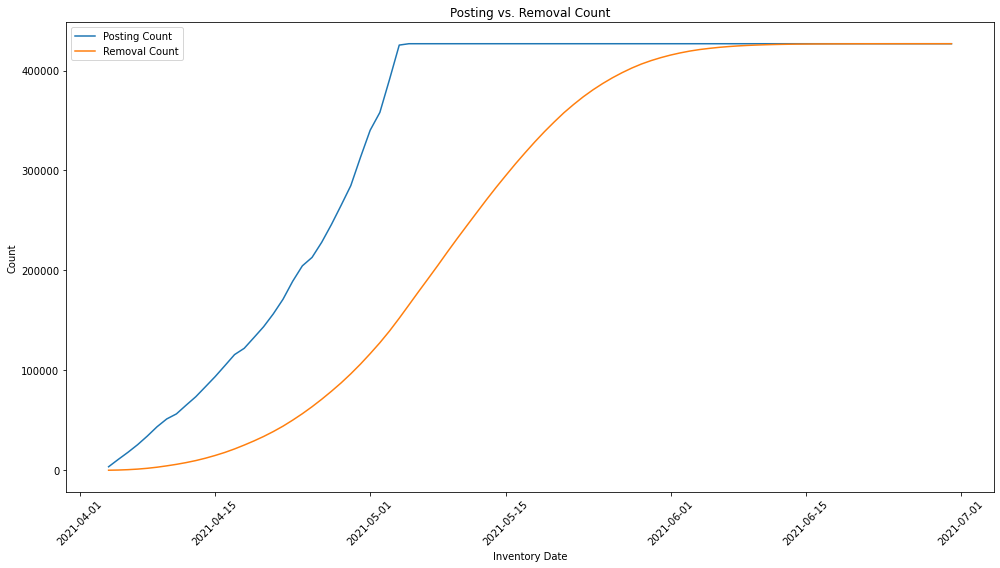

In [133]:
def plot_post_removal_inventory(df, title):

    # Set the inventory_date column as the index
    df.set_index('inventory_date', inplace=True)

    # Plotting the data
    plt.figure(figsize=(14, 8))
    plt.plot(df.index, df['posting_count'], label='Posting Count')
    plt.plot(df.index, df['removal_count'], label='Removal Count')

    # Set date label format and rotation
    date_format = mdates.DateFormatter('%Y-%m-%d')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.xticks(rotation=45)

    # Customize other plot elements
    plt.xlabel('Inventory Date')
    plt.ylabel('Count')
    plt.title(title)
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()

plot_post_removal_inventory(df_inventory.copy(), 'Trend Posting vs. Removal Count')

#### Daily Post and Removal Count

We can clearly see here no new posts have been made on '2021-05-06' and we can see the removal of the posts slow catching up. We can utilize this chart to see posting behavior from users. We can also see a weekly trend and the posts drops off every Wednesday and peaks over the weekends.

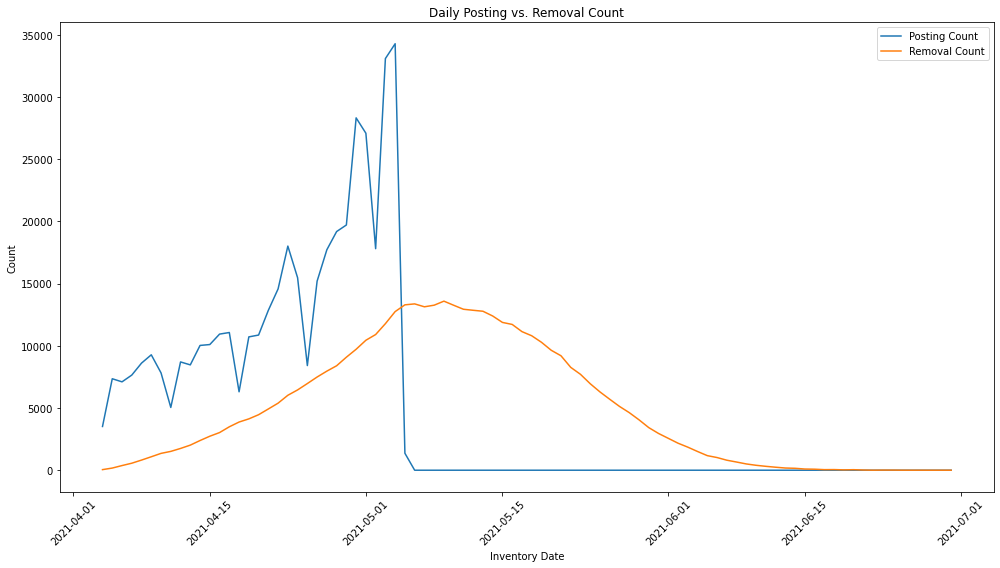

In [139]:
def plot_post_removal_count(df, title):

    # Set the inventory_date column as the index
    df.set_index('inventory_date', inplace=True)


    # Plotting the data
    plt.figure(figsize=(14, 8))
    plt.plot(df.index, df['daily_posting_count'], label='Posting Count')
    plt.plot(df.index, df['daily_removal_count'], label='Removal Count')

    # Set date label format and rotation
    date_format = mdates.DateFormatter('%Y-%m-%d')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.xticks(rotation=45)

    # Customize other plot elements
    plt.xlabel('Inventory Date')
    plt.ylabel('Count')
    plt.title(title)
    plt.legend()

    # Display the plot
    plt.tight_layout()
    plt.show()

plot_post_removal_count(df_inventory.copy(), 'Daily Posting vs. Removal Count')

#### Number of Vehicles Posted per Region 

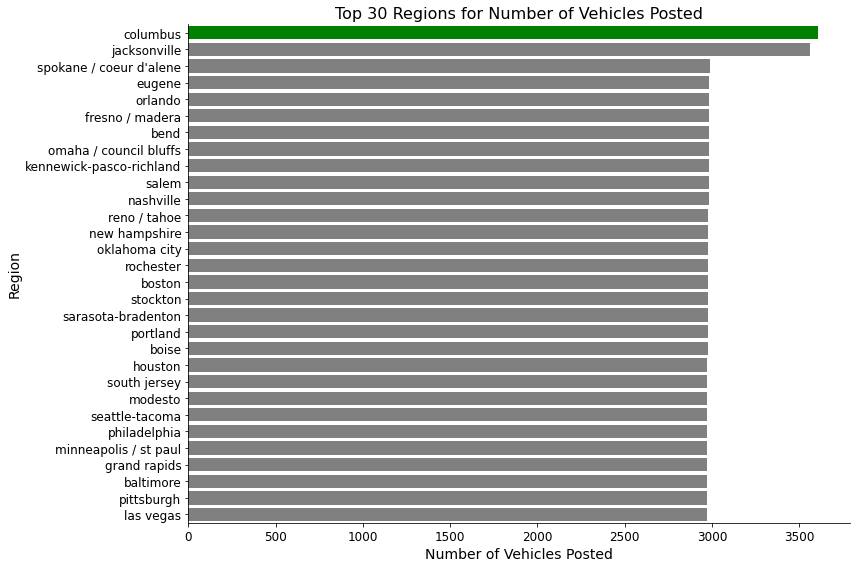

In [65]:
manufacturer_counts = df_craiglist['region'].value_counts().sort_values(ascending=True)
# limit only to the top 30 regions
manufacturer_counts = manufacturer_counts[-30:]
colors = plt.cm.Set3(range(len(manufacturer_counts)))

fig, ax = plt.subplots(figsize=(12, 8))
manufacturer_counts.plot(kind='barh', ax=ax)
# Define a different color for the top bar
highlight_color = 'green'
other_colors = 'gray'

# Plot the bars with different colors
ax.barh(manufacturer_counts.index[:-1], manufacturer_counts[:-1], color=other_colors)
ax.barh(manufacturer_counts.index[-1], manufacturer_counts[-1], color=highlight_color)

# Customize the appearance
ax.set_xlabel('Number of Vehicles Posted', fontsize=14)
ax.set_ylabel('Region', fontsize=14)
ax.set_title('Top 30 Regions for Number of Vehicles Posted', fontsize=16)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(False)
plt.tight_layout()

plt.show()

#### Get Inventory for Columbus

In [145]:
df_inv_columbus = create_inventory_model_count('2021-04-04', '2021-06-30', 'columbus')

In [146]:
df_inv_columbus.head(5)

,inventory_date,posting_count,removal_count,inventory_count,daily_posting_count,daily_removal_count
0,2021-04-04,16,0,16,16,0
1,2021-04-05,38,0,38,22,0
2,2021-04-06,60,2,58,22,2
3,2021-04-07,107,3,104,47,1
4,2021-04-08,228,10,218,121,7


#### Trend Line Report for Daily Inventory Count for Columbus

Similr report above with just a filter for Columbus, ideally we can create multiple trend lines or bar plots but this is just to demonstrate the model is working as intended.

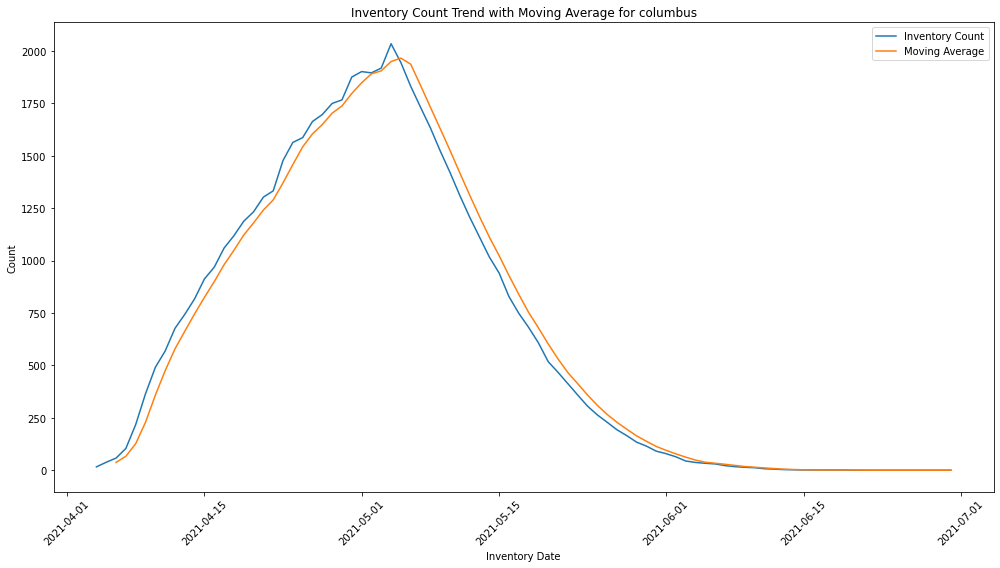

In [147]:
plot_trend_inventory(df_inv_columbus.copy(), 'Inventory Count Trend with Moving Average for columbus')

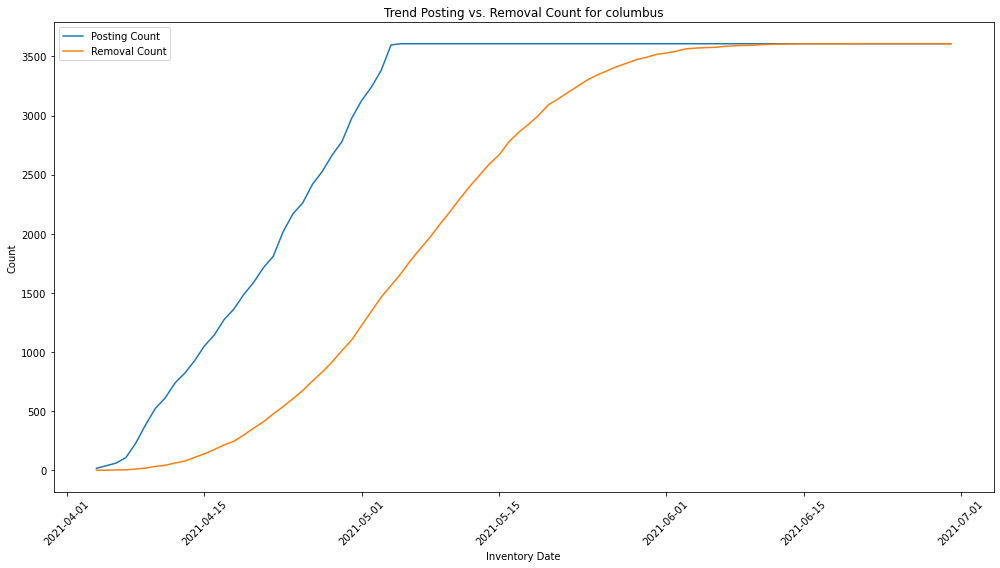

In [148]:
plot_post_removal_inventory(df_inv_columbus.copy(), 'Trend Posting vs. Removal Count for columbus')

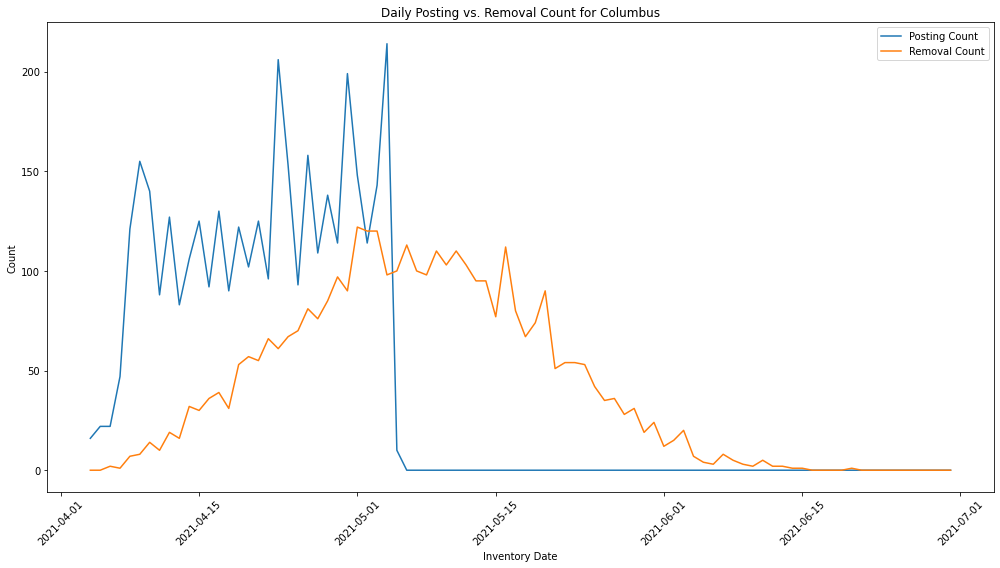

In [149]:
plot_post_removal_count(df_inv_columbus.copy(), 'Daily Posting vs. Removal Count for Columbus')

### Proposed Data Model

Ideally, the model or dataframe created in this notebook is calculated based on the assumption that once a post is removed, it is no longer part of the inventory. The same dataset can also be used for Time Series Analysis in Predictive Data Science Models, with additional data processing to determine the desired prediction window. This cn be achieved in a more optimized form once we have the main dataset in the warehouse and perform post-processing after ETL and apply different level of aggregations. 

As described in the case, we can apply various filters apply feature engineering and utilize a similar approach on the dataset to obtain additional insights. Furthermore, we aim to utilize more dynamic reporting tools like Tableau or PowerBI, as they provide easier visualization capabilities. While it is feasible to achieve similar results in Python, implementing them in reporting tools requires less coding effort and offers a more intuitive interface for creating visualizations.

In a real-world scenario, the main dataset should be modeled according to specific requirements for optimal data management. The current format of the dataset is well-suited for reporting purposes. However, if the goal is to achieve more structured storage, alternatives such as normalizing the data to the third normal form (3NF) or implementing a star or snowflake model in a data warehouse can be explored.

    'id' - Primary Key
    'url'
    'region' - Separate Table
    'region_url'  - Separate Table
    'price'
    'year'
    'manufacturer' - Separate Table
    'model'  - Separate Table
    'condition'
    'cylinders' - Separate Table 
    'fuel' - Separate Table 
    'odometer'
    'title_status'
    'transmission'  - Separate Table 
    'VIN'
    'drive' - Separate Table 
    'size' - Separate Table 
    'type' - type
    'paint_color' 
    'image_url'
    'description'
    'lat' 
    'long' 
    'posting_date'
    'removal_date'

If we  want to normalize this we can separate the tables to improve integrity of the data.
    
    posting_table:
    'id' - Primary key
    'state_id' - Foreign key Join on state table to get region
    'model_id' - Foreign key Join with model table to also get all deatils
    'url'
    'price'
    'year'
    'condition'
    'odometer'
    'title_status'
    'VIN'
    'paint_color' 
    'image_url'
    'description'
    'lat' - kept it here the a logic should handle if lat long is valid for a state / region
    'long'
    'posting_date'
    'removal_date'
    'posting_date'
    To enhance reporting capabilities for our Fact Table, we can include parsed dates that provide additional granularity. This can involve adding fields such as quarter, week of month, week of year, or even a time element. Depending on the requirements, design, and performance of the models, a separate time dimension can also be considered.
    'posting_date_year'
    'posting_date_month'
    'posting_date_dt'
    'removal_date'
    'removal_date_year'
    'removal_date_month'
    'removal_date_dt'
    
    location_table:
    'state_id' - Primary key
    'county'
    'region' - we can still have another level of table for this if needed
    'region_url'
    
    vehicle_table: 
    'model_id' - Primary key
    'manufacturer - we cn still have another level of table for this if needed
    'cylinders'
    'fuel' 
    'drive' 
    'size' 
    'type' 
    

In conclusion, this exercise serves as an exploratory analysis, as described in the case, to demonstrate how inventory analysis can be performed even in the absence of confirmed transaction data. By leveraging and analyzing the available fields and employing feature engineering techniques, we can uncover valuable insights through thorough analysis. Furthermore, I wanted to demonstrate my understanding of data modeling, even though specific data types have not been provided. Nevertheless, based on the logical model, we can establish a structure that can be utilized for further development.